In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
npy_dir = '../../dataset/image_formation/20231007/npy_data'

sample_pts = np.array([[10 + i*120, 50 + j*51] for j in range(10) for i in range(8)])
sample_pts_flatt = np.array([[sample_pts[i,0]+sample_pts[i,1]*890] for i in range(sample_pts.shape[0])]).squeeze()
        

In [3]:
max_data_front = np.load(os.path.join(npy_dir, 'max_data_front.npy'))
max_data_mid = np.load(os.path.join(npy_dir, 'max_data_mid.npy'))
max_data_mid2 = np.load(os.path.join(npy_dir, 'max_data_mid2.npy'))
max_data_mid3 = np.load(os.path.join(npy_dir, 'max_data_mid3.npy'))
max_data_back = np.load(os.path.join(npy_dir, 'max_data_back.npy'))

In [26]:
np.median(max_data_front[0,:,sample_pts_flatt[38]])

0.06445410849164569

In [4]:
# plt.ylim([0,0.1])
# plt.plot(max_data_front[-1,:,sample_pts_flatt[39]] - 0.02)

In [5]:
# for i in range(80):
#     plt.figure()
#     plt.ylim([0,0.1])
#     plt.plot(max_data_front[-1,:,sample_pts_flatt[i]]), plt.title(i)

In [83]:
max_data_front_cp[3,:200,sample_pts_flatt[79]].max()

0.08295231555657281

In [90]:
idx_list = np.array([3 + 8*i for i in range(10)])

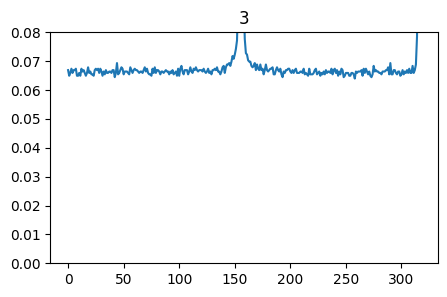

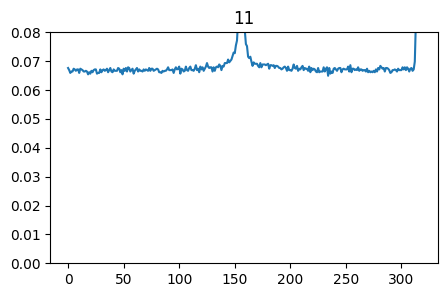

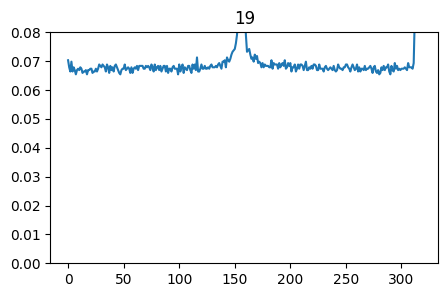

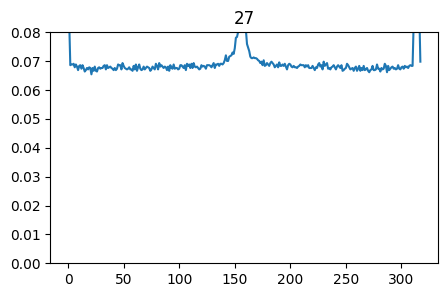

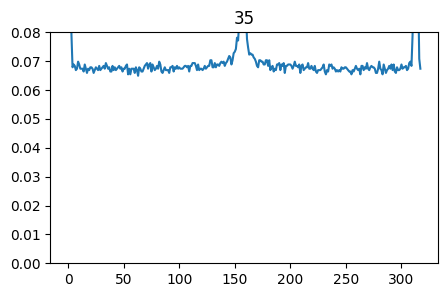

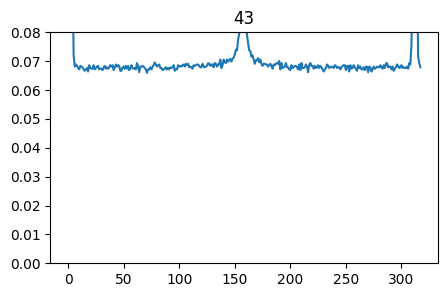

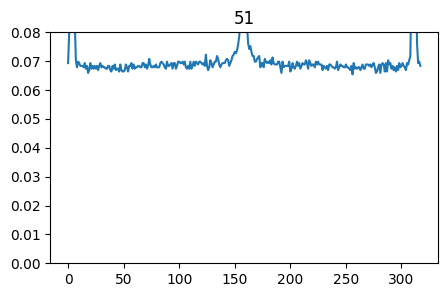

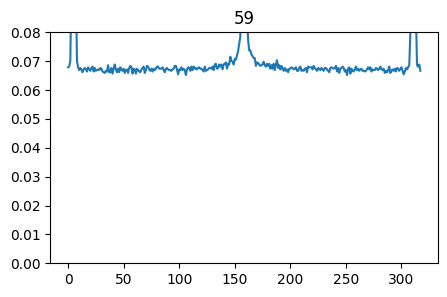

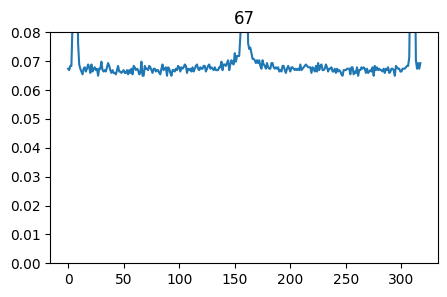

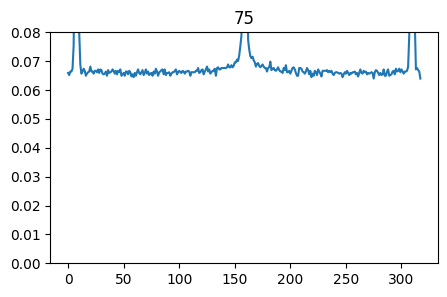

In [95]:
w_idx = 2
max_data_front_cp = max_data_back.copy()        
        
for idx, i in enumerate(sample_pts_flatt):
    if idx in idx_list:
        plt.figure(figsize=(5,3))
        plt.ylim([0,0.08])
        if (np.median(max_data_front_cp[w_idx,:,i]) > 0.07) and (np.median(max_data_front_cp[w_idx,:,i]) < 0.09):
            max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.02
        if (np.median(max_data_front_cp[w_idx,:,i]) >= 0.09):
            max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.03
        if(max_data_front_cp[w_idx,:,i].min() <= 0.06):
            max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] + 0.008

        plt.plot(max_data_front_cp[w_idx,:,i]), plt.title(idx)

In [6]:
depth_peak_illum_idx = np.load(os.path.join(npy_dir,'depth_peak_illum_idx.npy'))

In [7]:
depth_peak_illum_idx.shape

(301, 3, 7, 110)

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


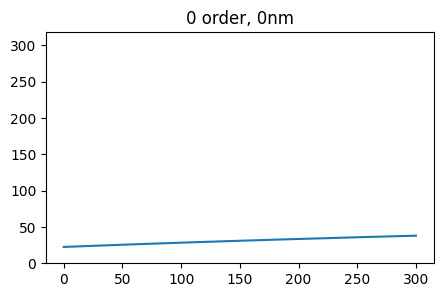

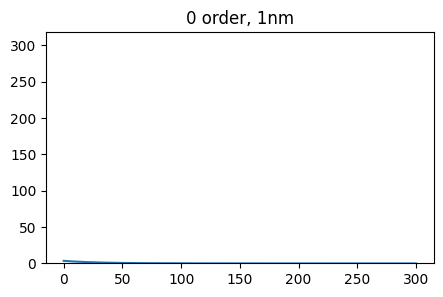

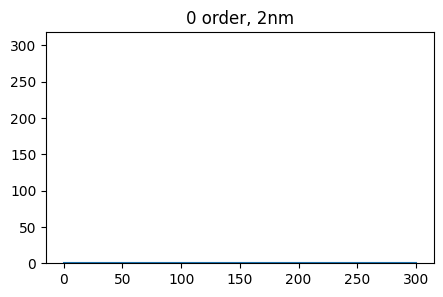

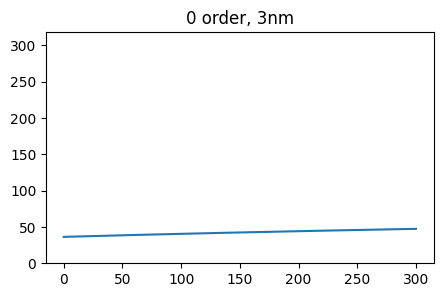

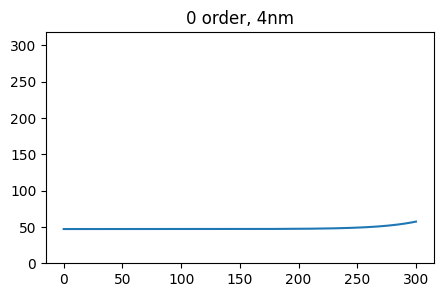

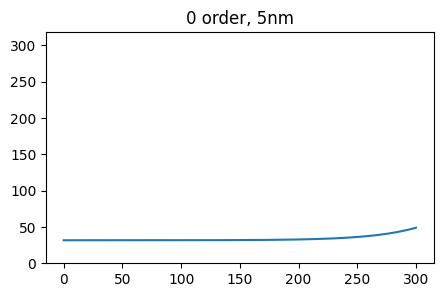

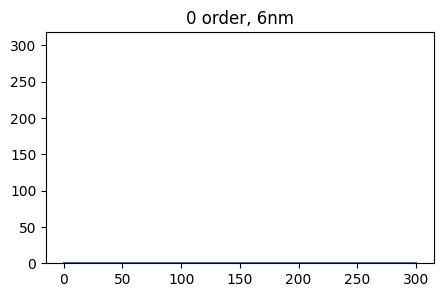

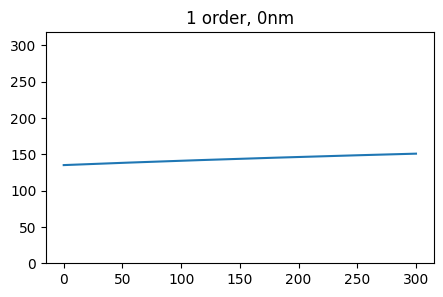

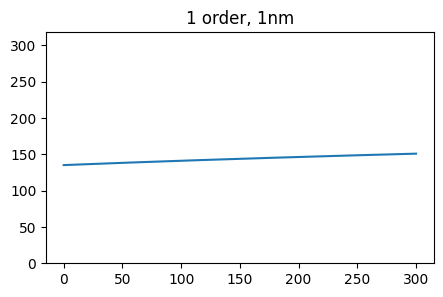

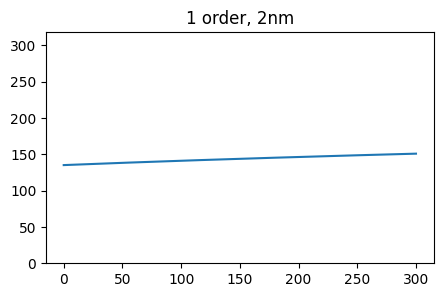

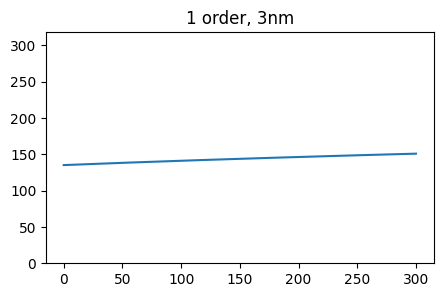

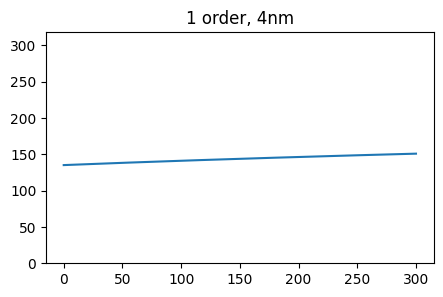

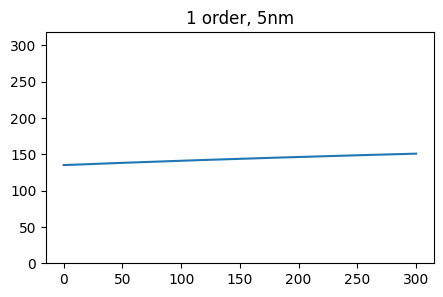

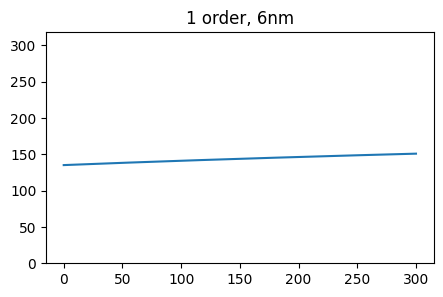

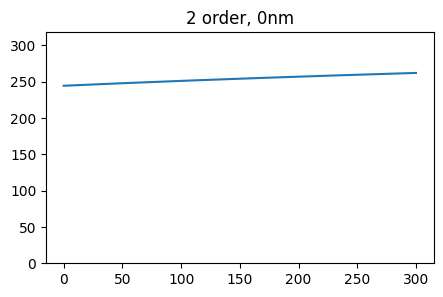

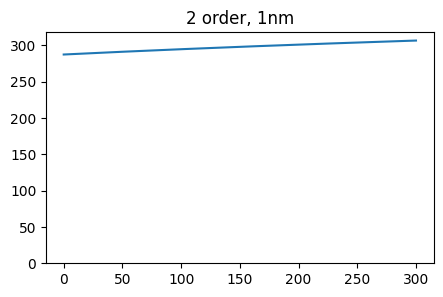

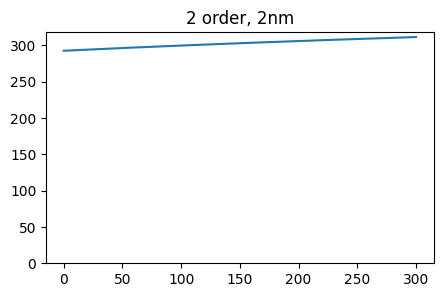

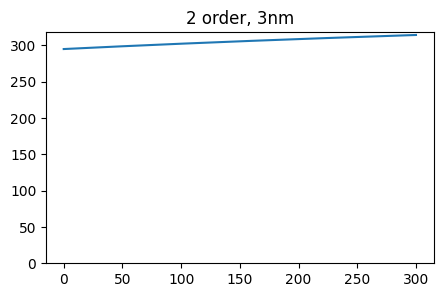

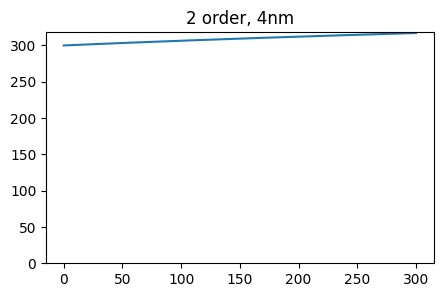

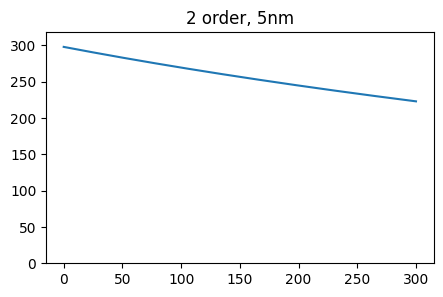

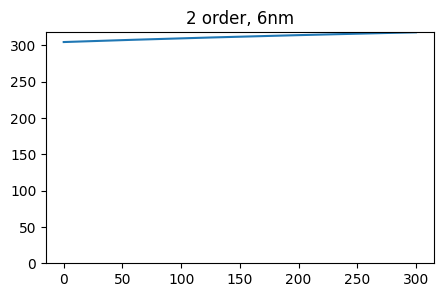

In [19]:
for i in range(3):
    for w in range(7):
        plt.figure(figsize=(5,3))
        plt.ylim([0, 318])
        plt.plot(depth_peak_illum_idx[:,i,w,4]), plt.title('%d order, %dnm'%(i, w))